# DEM validation

Script to validate a DEM using check points (usually collected with RTK GPS, or other survey methods).  The script evaluates vertical differences between check points and DEM.  Scipy ```ndimage.map_coordinates``` is used to do a bilinear interpolation of DEM z values for each checkpoint.  RMSE and other statistics are calculated, and an error distribution plot and map showing checkpoints on a hillshade of the DEM are optionally created.

See [demValidation_initial_tests.ipynb](demValidation_initial_tests.ipynb) for specifics on calculations performed in [demValidate.py](demValidate.py).

***

In [1]:
# import DEM validation functions from demValidate.py

# first set python path
import sys
sys.path.append('D:/jloganPython/dem-validation/')

from demValidate import *

In [2]:
#jupyter magic
%matplotlib notebook

### Perform DEM validation using 'dem_validate' function
    
   ```
   dem_validate:
    
    Function to validate dem using a csv file with check points.  Performs bilinear interpolation on dem at each
    checkpoint using  scipy.ndimage.map_coordinates.  Only vertical residuals are calculated.
    Dem file should be geotiff format. Checkpoint file must have columns named
    'n','e', and 'z' (y coordinate, x coordinate, and z coordinate).

    args:
        demfile: path to geotiff dem (single band only)
        checkfile: csv file 'n','e', and 'z' columns (with header)
        outfile: path to output csv file (input checkfile, plus dem value at each point)

    returns:
        valstats: dictionary with rmse, mean_offset, std_dev, mean_abs_error
        valdf: dataframe with input checkpoints, and dem value at each point
        dem: numpy array of dem (for use in plot_map function)
        aff: affine transform (for use in plot_map function)```
   
    

In [3]:
valstats, valdf, dem, aff = dem_validate('D:\\UAS\\2018-605-FA\\products\\DEM\\DEM_GrndClass\\2018-04-ClvCorral_DEM_5cm_clip.tif', 
                                         'D:\\UAS\\2018-605-FA\\GPS\\2018-04-ClvCorral_RTK_Validation_nez.csv', 
                                         'D:\\UAS\\2018-605-FA\\GPS\\2018-04-ClvCorral_RTK_Validation_nez_DEMz.csv')

RMSE: 0.083
Mean offset: -0.037
Std. Dev.: 0.075
MAE: 0.063


In [4]:
valdf.head()


,pid,n,e,gps_z,code,surveyor,demcol,demrow,dem_z,resid
0,10000,4295430.764,724054.214,1179.339,EAST-TOE,SC,3684.28,6844.72,1179.399902,-0.060902
1,10001,4295430.487,724053.696,1179.199,EAST-TOE,SC,3673.92,6850.26,1179.320923,-0.121923
2,10002,4295429.558,724053.421,1179.067,EAST-TOE,SC,3668.42,6868.84,1179.213013,-0.146013
3,10003,4295429.000,724053.196,1179.021,EAST-TOE,SC,3663.92,6880.00,1179.113037,-0.092037
4,10004,4295428.309,724053.012,1178.840,EAST-TOE,SC,3660.24,6893.82,1178.946411,-0.106411


### Plot distribution of residuals:

<IPython.core.display.Javascript object>


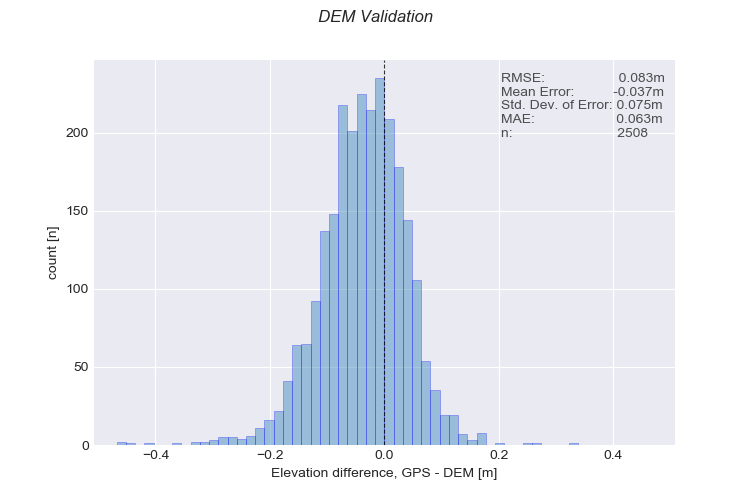

In [5]:
fig_err_dist = plot_error_dist(valdf)

### Plot map with hillshade of DEM and check point residuals by color:

<IPython.core.display.Javascript object>


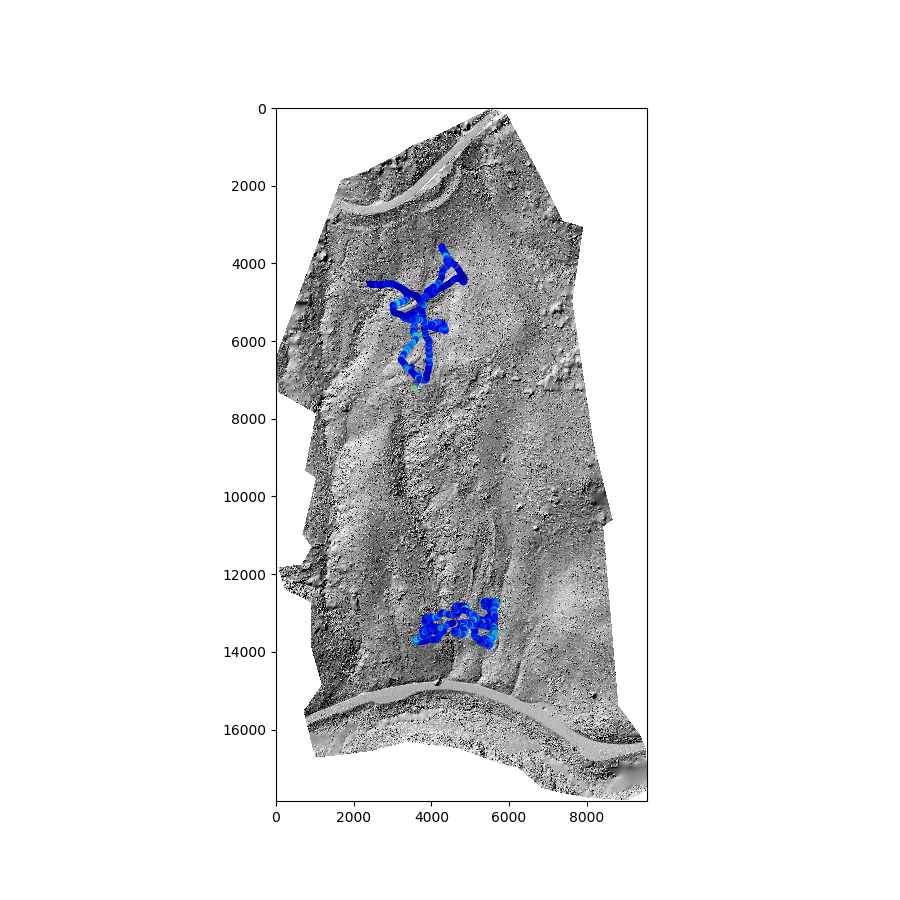

In [6]:
fig_map = plot_map(dem,valdf)